In [1]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [22]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [23]:
%cd yolov5

/home/minyoungxi/MINYOUNGXI/Project/캡스톤/yolov5


# 2. Load Model

In [24]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /home/minyoungxi/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-11-7 Python-3.8.16 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 4080, 16076MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [25]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections

In [26]:
img = 'https://media.gettyimages.com/id/658167276/video/road-traffic-on-highway-a5-traffic-jam-frankfurt-am-main-hesse-germany.jpg?s=640x640&k=20&c=SPvwgvbueKSOX_EKHcB8fZV8fqW-NxFyUZz90_pu6OM='

In [27]:
results = model(img)
results.print()

image 1/1: 360x640 6 persons, 27 cars, 1 bus, 1 truck
Speed: 46.2ms pre-process, 4.4ms inference, 1.1ms NMS per image at shape (1, 3, 384, 640)


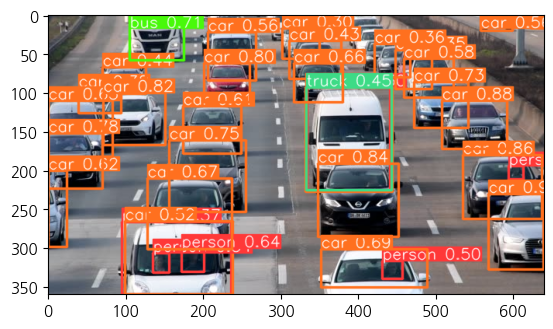

In [28]:
%matplotlib inline 

plt.imshow(np.squeeze(results.render()))
plt.show()

In [29]:
results.xyxy # xmin ymin xmax ymax confidence class를 나타냄

[tensor([[5.68913e+02, 2.31303e+02, 6.39061e+02, 3.28442e+02, 9.11436e-01, 2.00000e+00],
         [5.08325e+02, 1.11505e+02, 5.92834e+02, 1.73318e+02, 8.81016e-01, 2.00000e+00],
         [5.35837e+02, 1.81227e+02, 6.37313e+02, 2.63204e+02, 8.57838e-01, 2.00000e+00],
         [3.48251e+02, 1.92718e+02, 4.52956e+02, 2.86587e+02, 8.41656e-01, 2.00000e+00],
         [7.12524e+01, 1.01248e+02, 1.51939e+02, 1.68733e+02, 8.23032e-01, 2.00000e+00],
         [2.01641e+02, 6.39382e+01, 2.60958e+02, 1.13928e+02, 7.96525e-01, 2.00000e+00],
         [0.00000e+00, 1.53373e+02, 7.01001e+01, 2.24185e+02, 7.78438e-01, 2.00000e+00],
         [1.56921e+02, 1.62438e+02, 2.55995e+02, 2.54609e+02, 7.50061e-01, 2.00000e+00],
         [4.72696e+02, 8.70925e+01, 5.42084e+02, 1.46272e+02, 7.25764e-01, 2.00000e+00],
         [1.05893e+02, 6.75394e-01, 1.75221e+02, 5.90717e+01, 7.05649e-01, 5.00000e+00],
         [3.52007e+02, 3.02310e+02, 4.89316e+02, 3.51609e+02, 6.93672e-01, 2.00000e+00],
         [1.28532e+02

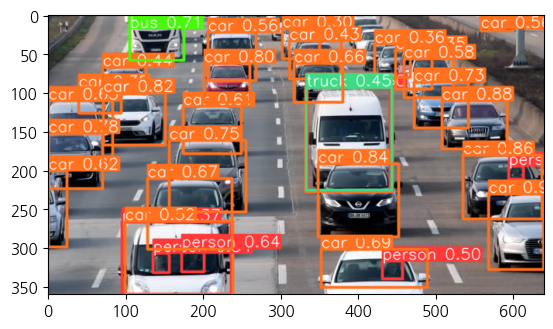

In [30]:
plt.imshow(np.squeeze(results.render()))

# 4. Real Time Detection

In [9]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.8.0) /io/opencv/modules/highgui/src/window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


# 5. Train From Scratch

In [31]:
%cd ../

/home/minyoungxi/MINYOUNGXI/Project/캡스톤


In [32]:
import uuid # Unique identifier
import os
import time

In [33]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [30]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x1ca3e980) is not the object's thread (0x2b67e670).
Cannot move to target thread (0x1ca3e980)

QObject::moveToThread: Current thread (0x1ca3e980) is not the object's thread (0x2b67e670).
Cannot move to target thread (0x1ca3e980)

QObject::moveToThread: Current thread (0x1ca3e980) is not the object's thread (0x2b67e670).
Cannot move to target thread (0x1ca3e980)

QObject::moveToThread: Current thread (0x1ca3e980) is not the object's thread (0x2b67e670).
Cannot move to target thread (0x1ca3e980)

QObject::moveToThread: Current thread (0x1ca3e980) is not the object's thread (0x2b67e670).
Cannot move to target thread (0x1ca3e980)

QObject::moveToThread: Current thread (0x1ca3e980) is not the object's thread (0x2b67e670).
Cannot move to target thread (0x1ca3e980)

QObject::moveToThread: Current thread (0x1ca3e980) is not the object's thread (0x2b67e670).
Cannot move to target thread (0x1ca3e980)

QObject::moveToThread: Current thread (0x1ca3e980) is n

QObject::moveToThread: Current thread (0x1ca3e980) is not the object's thread (0x2b67e670).
Cannot move to target thread (0x1ca3e980)

QObject::moveToThread: Current thread (0x1ca3e980) is not the object's thread (0x2b67e670).
Cannot move to target thread (0x1ca3e980)

QObject::moveToThread: Current thread (0x1ca3e980) is not the object's thread (0x2b67e670).
Cannot move to target thread (0x1ca3e980)

QObject::moveToThread: Current thread (0x1ca3e980) is not the object's thread (0x2b67e670).
Cannot move to target thread (0x1ca3e980)

QObject::moveToThread: Current thread (0x1ca3e980) is not the object's thread (0x2b67e670).
Cannot move to target thread (0x1ca3e980)

QObject::moveToThread: Current thread (0x1ca3e980) is not the object's thread (0x2b67e670).
Cannot move to target thread (0x1ca3e980)

QObject::moveToThread: Current thread (0x1ca3e980) is not the object's thread (0x2b67e670).
Cannot move to target thread (0x1ca3e980)

QObject::moveToThread: Current thread (0x1ca3e980) is n

KeyboardInterrupt: 

In [34]:
import os
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/images/awake.42ddfb3a-7d78-11ee-9216-d85ed3e7290d.jpg


In [17]:
!git clone https://github.com/HumanSignal/labelImg.git

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [14]:
!pip install pyqt5 lxml --upgrade

In [15]:
!export WANDB_MODE=disabled

In [35]:
!cd yolov5 && python train.py --img 320 --batch 32 --epochs 1000 --data dataset.yaml --weights yolov5s.pt

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: dbssus123 (daejinuniv). Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1000, batch_size=32, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-240-g84ec8b5 Python-3.8.16 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX

# 6. Load Model

In [36]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/home/minyoungxi/MINYOUNGXI/Project/캡스톤/yolov5/runs/train/exp16/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/minyoungxi/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-11-7 Python-3.8.16 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 4080, 16076MiB)

Fusing layers... 
Model summary: 157 layers, 7064065 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [37]:
img = os.path.join('data', 'images', 'awake.06845128-7bc2-11ee-94c9-d85ed3e7290d.jpg')

In [38]:
results = model(img)

In [39]:
results.print()

image 1/1: 480x640 1 awake
Speed: 4.4ms pre-process, 15.1ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)


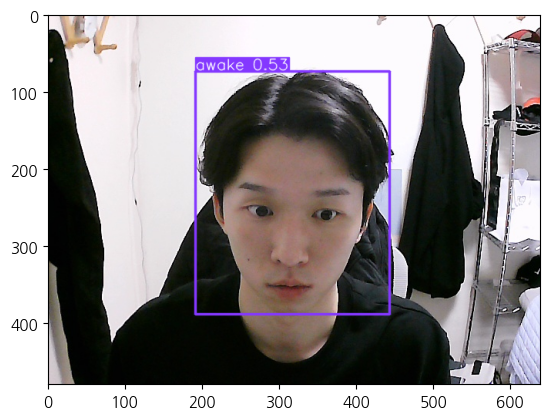

In [40]:
plt.imshow(np.squeeze(results.render()))

In [41]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x851120a0) is not the object's thread (0x88269250).
Cannot move to target thread (0x851120a0)

QObject::moveToThread: Current thread (0x851120a0) is not the object's thread (0x88269250).
Cannot move to target thread (0x851120a0)

QObject::moveToThread: Current thread (0x851120a0) is not the object's thread (0x88269250).
Cannot move to target thread (0x851120a0)

QObject::moveToThread: Current thread (0x851120a0) is not the object's thread (0x88269250).
Cannot move to target thread (0x851120a0)

QObject::moveToThread: Current thread (0x851120a0) is not the object's thread (0x88269250).
Cannot move to target thread (0x851120a0)

QObject::moveToThread: Current thread (0x851120a0) is not the object's thread (0x88269250).
Cannot move to target thread (0x851120a0)

QObject::moveToThread: Current thread (0x851120a0) is not the object's thread (0x88269250).
Cannot move to target thread (0x851120a0)

QObject::moveToThread: Current thread (0x851120a0) is n

In [42]:
torch.save({'model': model.state_dict()}, 'data+_model.pt')

In [43]:
ckpt = torch.load('model.pt', map_location='cpu')
model.load_state_dict(ckpt['model'])

FileNotFoundError: [Errno 2] No such file or directory: 'model.pt'

In [44]:
import torch
from models.yolo import Model
from utils.general import check_img_size

weights = '/home/minyoungxi/MINYOUNGXI/Project/캡스톤/model.pt'  # 가중치 파일 경로
img_size = 320  # 모델 입력 이미지 크기
device = 'cpu'  # CPU에서 실행

# YOLOv5s 모델 구성 파일 로드
model = Model(cfg='/home/minyoungxi/MINYOUNGXI/Project/캡스톤/yolov5/models/yolov5s.yaml', ch=3, nc=17)  # adjust nc according to your number of classes
model.to(device)

# 가중치 로드
ckpt = torch.load(weights, map_location=device)  # 가중치 로드
model.load_state_dict(ckpt['model'].state_dict())  # state_dict를 적용

model.eval()  # 평가 모드

# ONNX 변환
stride = int(model.stride.max())  # model stride
img_size = check_img_size(img_size, s=stride)  # img_size 확인 및 조정
dummy_input = torch.randn(1, 3, img_size, img_size).to(device)  # 더미 입력
onnx_path = weights.replace('.pt', '.onnx')  # 출력 ONNX 파일 경로
torch.onnx.export(model, dummy_input, onnx_path, verbose=False, opset_version=12, input_names=['images'], output_names=['output'])


Overriding model.yaml nc=80 with nc=17

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]            

FileNotFoundError: [Errno 2] No such file or directory: '/home/minyoungxi/MINYOUNGXI/Project/캡스톤/model.pt'

In [28]:
import torch.onnx

# 더미 입력 데이터 생성 (예: 1x3x320x320 크기의 이미지)
dummy_input = torch.randn(1, 3, 320, 320, device='cpu')

# 모델을 평가 모드로 설정
model.eval()

# ONNX 파일로 내보내기
torch.onnx.export(model,  # 실행될 모델
                  dummy_input,  # 모델 입력값 (튜플의 텐서들, 혹은 단일 텐서)
                  "output_model.onnx",  # 모델을 저장할 파일명
                  export_params=True,  # 모델 파일 안에 학습된 가중치를 저장할지의 여부
                  opset_version=10,  # 모델을 변환할 때 사용할 ONNX 버전
                  do_constant_folding=True,  # 최적화 여부
                  input_names = ['input'],  # 모델의 입력값을 가리키는 이름
                  output_names = ['output'],  # 모델의 출력값을 가리키는 이름
                  dynamic_axes={'input' : {0 : 'batch_size'},  # 가변 길이 차원
                                'output' : {0 : 'batch_size'}})


/home/minyoungxi/.cache/torch/hub/ultralytics_yolov5_master/models/yolo.py:207: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if augment:
/home/minyoungxi/.cache/torch/hub/ultralytics_yolov5_master/models/yolo.py:119: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if profile:
/home/minyoungxi/.cache/torch/hub/ultralytics_yolov5_master/models/yolo.py:123: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. T

================ Diagnostic Run torch.onnx.export version 2.0.1 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



In [31]:
import onnxruntime as ort
import numpy as np

# ONNX 런타임 세션 생성
session = ort.InferenceSession("output_model.onnx")

# 입력 데이터 준비 (예시입니다, 실제 입력 데이터에 맞게 조정하세요)
input_data = np.random.randn(1, 3, 320, 320).astype(np.float32)

# 모델의 입력 이름과 출력 이름 가져오기
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

# 추론 실행
outputs = session.run([output_name], {input_name: input_data})

# 결과 출력 (예시입니다, 실제 요구 사항에 맞게 조정하세요)
print(outputs)


[array([[[     4.2521,      3.8045,      10.731, ...,    0.034416,    0.035917,    0.039281],
        [     12.252,      3.8045,      10.731, ...,    0.034416,    0.035917,    0.039281],
        [     20.252,      3.8045,      10.731, ...,    0.034416,    0.035917,    0.039281],
        ...,
        [     239.77,      303.69,      382.06, ...,    0.035391,    0.036582,     0.03745],
        [     271.77,      303.69,      382.06, ...,    0.035391,    0.036582,     0.03745],
        [     303.77,      303.69,      382.06, ...,    0.035391,    0.036582,     0.03745]]], dtype=float32)]
